# Comparing different methods for the removal of surface reflected light

There are a large variety of methods for removing the specular glint and reflected skylight that can interfere with above water measurements of upwelling radiance. In this notebook we simply showcase the methods included in this code. Please feel free to contribute to the project and add more if you have a different preferred method.

This code will take some time to run, and if you're testing the options for the processing of a large dataset we recommend you run this on a subset of your data.

Pull in all the modules needed for this code.

In [1]:
from ipywidgets import FloatProgress, Layout
from IPython.display import display
from micasense import imageset as imageset
from micasense import capture as capture
import multiprocessing
import glob, shutil, os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import micasense.imageutils as imageutils
import micasense.plotutils as plotutils

import exiftool
import datetime

import subprocess
import math

from utils import *
# from georeg import *

import random
import cameratransform as ct
from rasterio.merge import merge

In [2]:
# this isn't really good practice but there are a few deprecated tools in the Micasense stack so we'll ignore some of these warnings
import warnings
warnings.filterwarnings('ignore')

If you want to just put in your raw Micasense imagery and process it to deglinted, corrected Rrs imagery you can do that with this simple function:

All that you have to do manually is split your data up into this exact structure (name the main_dir whatever you want and put that into the function and keep the rest exactly as named here:
```
    <main_dir>/
        raw_water_imgs/
        align_img/
        raw_sky_imgs/
        panel/
```

With that structure now just specify the path to <main_dir> below:

In [3]:
project_path = os.path.join('sample_datasets','turbid_estuarine_dataset')
#project_path = os.path.join('sample_datasets','open_ocean_dataset')
project_path

'sample_datasets/turbid_estuarine_dataset'

## Comparing all reflected skylight removal options

#### 1) Raw -> Lt -> Lw (Hedley method) / Ed (DLS) -> Rrs w/o pixel masking

In [8]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False, ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 13 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:24.341854
Alignment+Saving rate: 0.66 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

#### 2) Raw -> Lt -> Lw (Hedley method) / Ed (panel) -> Rrs w/o pixel masking

In [4]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False, ed_method='panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 4
Finished aligning band 1
Finished aligning band 3
Saving time: 0:00:00.015425
Alignment+Saving rate: 1037.28 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Normalizing by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by panel_ed irradiance.
Not masking pixels.


True

#### 3) Raw -> Lt -> Lw (Hedley method) / Ed (DLS w/ panel corr) -> Rrs w/o pixel masking

In [5]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False, ed_method='dls_and_panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 3
Finished aligning band 4
Finished aligning band 1


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.019092
Alignment+Saving rate: 838.05 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS corrected by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_and_panel_ed irradiance.
Not masking pixels.


True

#### 4) Raw -> Lt -> Lw (Black pixel method) / Ed (DLS w/ panel corr) -> Rrs w/o pixel masking

In [6]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_blackpixel', output_csv_path=project_path, lw_method='blackpixel_method', 
                   mask_pixels=False, ed_method='dls_and_panel_ed', overwrite=False, clean_intermediates=False)

Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4
Finished aligning band 2


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.015942
Alignment+Saving rate: 1003.64 images per second
Finished saving images.
Finished saving image metadata.
Converting raw sky images to radiance (raw sky -> Lsky).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_sky_imgs
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 2
Finished aligning band 4
Finished aligning band 3


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:01.162808
Alignment+Saving rate: 0.86 images per second
Finished saving images.
Finished saving image metadata.
Applying the blackpixel_method (Lt -> Lw)
Normalizing by DLS corrected by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/panel
All data has been saved as Rrs using the blackpixel_method to calcualte Lw and normalized by dls_and_panel_ed irradiance.
Not masking pixels.


True

#### 5) Raw -> Lt -> Lw (Mobley method) / Ed (DLS w/ panel corr) -> Rrs w/o pixel masking

In [7]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_mobley', output_csv_path=project_path, lw_method='mobley_method', random_n=15,
                   mask_pixels=False, ed_method='dls_and_panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3
Finished aligning band 2


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.013866
Alignment+Saving rate: 1153.90 images per second
Finished saving images.
Finished saving image metadata.
Not doing any Lw calculation.
Normalizing by DLS corrected by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/panel
All data has been saved as Rrs using the mobley_method to calcualte Lw and normalized by dls_and_panel_ed irradiance.
Not masking pixels.


True

### Take a look at Rrs images to determine pixel masking thresholds

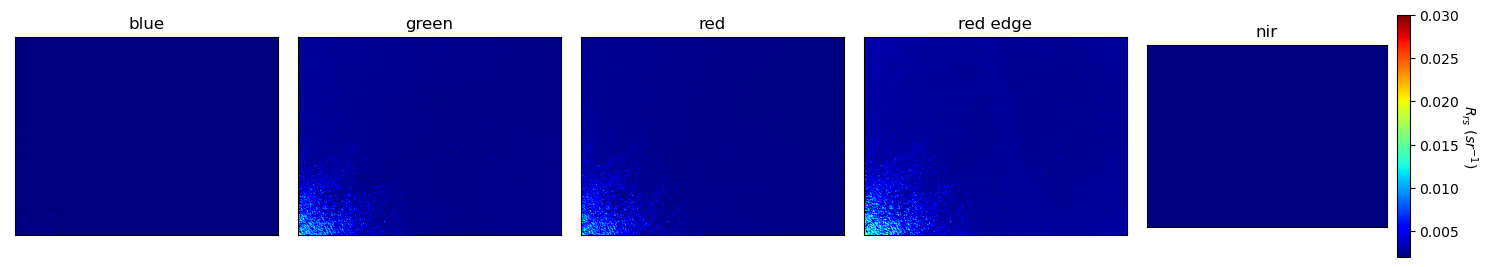

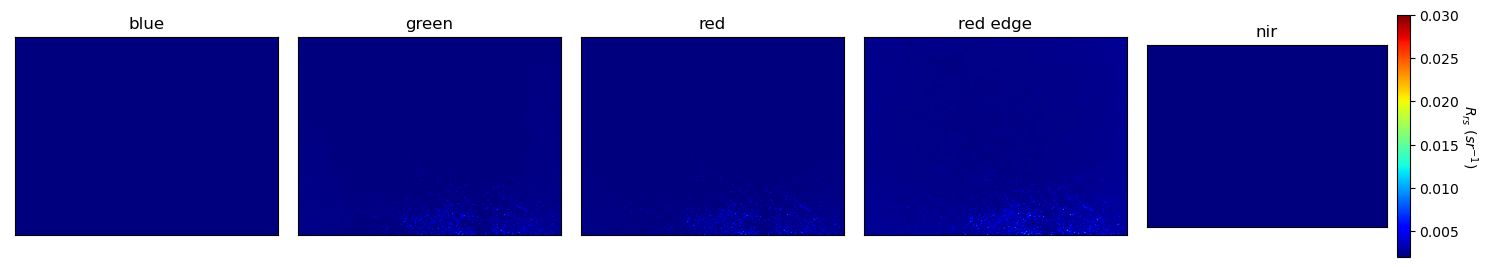

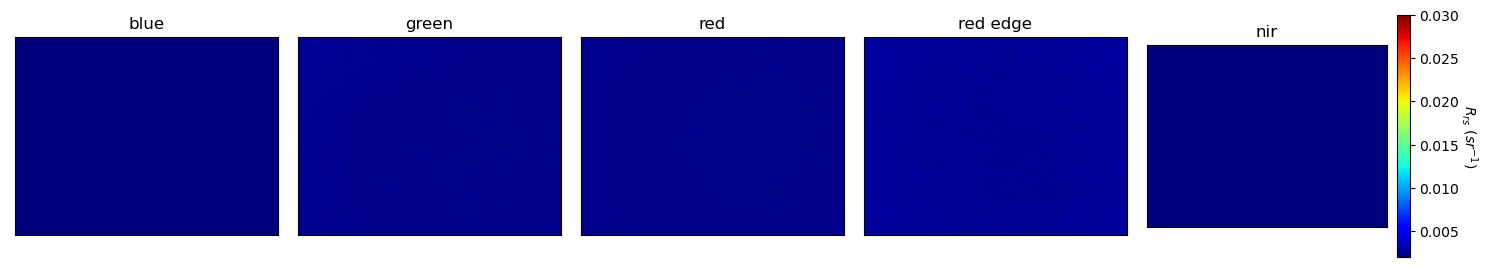

In [22]:
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')

band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

#### 6) Raw -> Lt -> Lw (Mobley method) / Ed (DLS w/ panel corr) -> Rrs w pixel masking (using thresholds)

In [4]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', 
                   mask_pixels=True, pixel_masking_method='value_threshold', nir_threshold=0.01, green_threshold=0,
                   ed_method='dls_and_panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/align_img
used warp dir sample_datasets/turbid_estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 4
Finished aligning band 2
Finished aligning band 3


/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.011310
Alignment+Saving rate: 1414.68 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS corrected by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/raw_water_imgs
Loading ImageSet from: sample_datasets/turbid_estuarine_dataset/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_and_panel_ed irradiance.
Masking pixels using NIR and green Rrs thresholds


True

### Read in data

(array([3.8000000e+01, 8.8500000e+02, 1.1023000e+04, 8.7896373e+07,
        1.9576670e+06, 4.3249000e+04, 3.4930000e+03, 6.7400000e+02,
        1.3900000e+02, 2.4000000e+01]),
 array([-0.11219539, -0.08257788, -0.05296035, -0.02334283,  0.00627469,
         0.03589221,  0.06550973,  0.09512725,  0.12474477,  0.15436229,
         0.18397981], dtype=float32),
 <BarContainer object of 10 artists>)

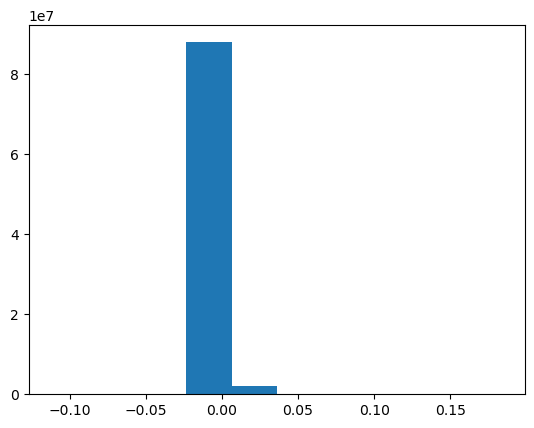

In [5]:
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')

plt.hist(masked_rrs_imgs_hedley.flatten())

### Take a look at Rrs images to visualize pixel masking

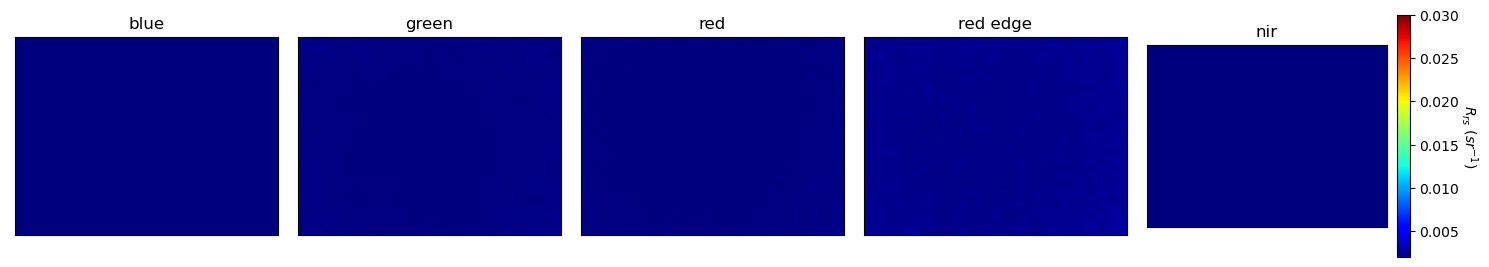

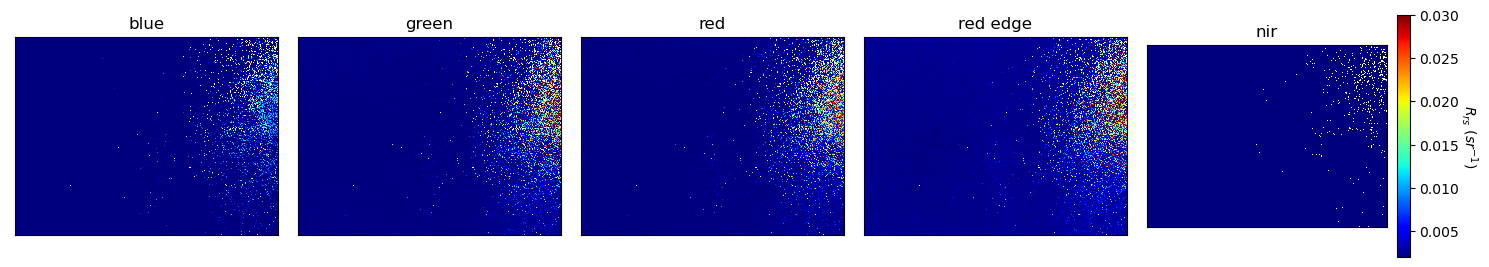

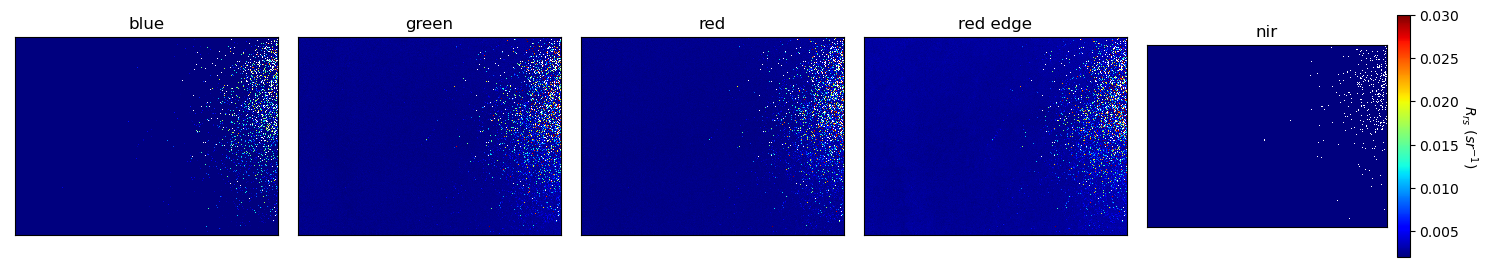

In [6]:
band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(masked_rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(masked_rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03,interpolation='none')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### pull all the data into memory

In [7]:
lt_imgs, lt_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
lsky_imgs, lsky_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/sky_lt_imgs', sky=True)

lw_imgs, lw_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lw_imgs')

dls_ed = pd.read_csv(project_path+'/dls_ed.csv') 
panel_ed = pd.read_csv(project_path+'/panel_ed.csv') 
dls_and_panel_ed = pd.read_csv(project_path+'/dls_corr_ed.csv') 

rrs_imgs_blackpixel, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_blackpixel')
rrs_imgs_mobley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_mobley')
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')

### View all spectra

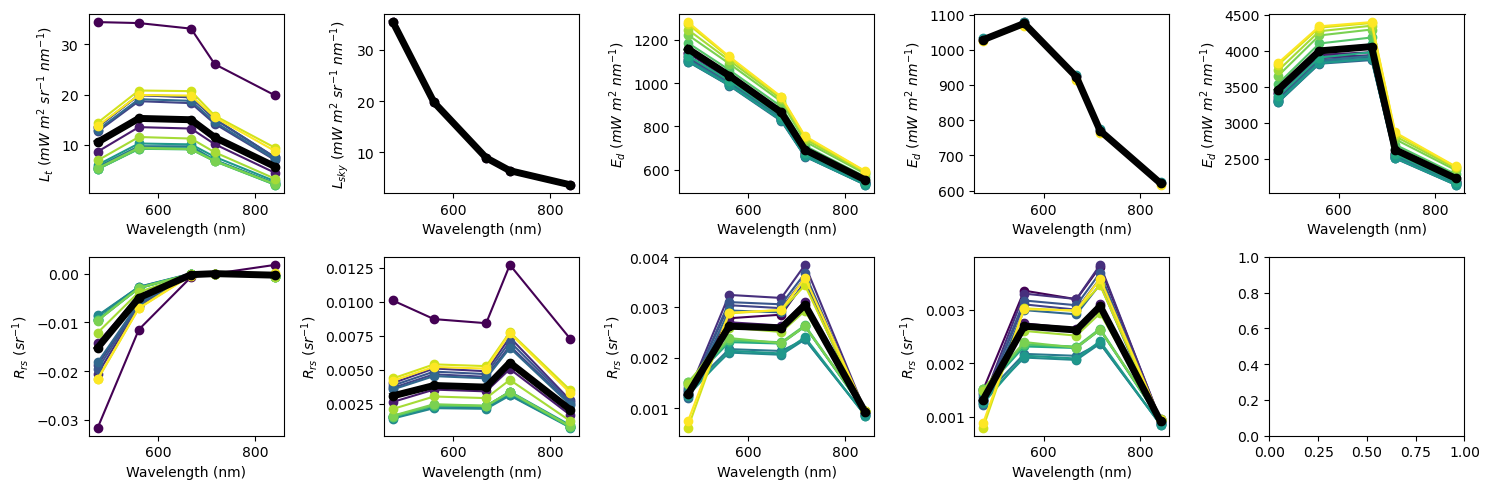

In [8]:
fig, ax = plt.subplots(2,5, figsize=(15,5))

wv = [475, 560, 668, 717, 842]
colors = plt.cm.viridis(np.linspace(0,1,len(lt_imgs)))

#lt
for i in range(len(lt_imgs)):
    ax[0,0].plot(wv, np.nanmean(lt_imgs[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[0,0].set_xlabel('Wavelength (nm)')
    ax[0,0].set_ylabel('$L_t\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')   
ax[0,0].plot(wv, np.nanmean(lt_imgs[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#lsky
colors = plt.cm.viridis(np.linspace(0,1,len(lsky_imgs)))

for i in range(len(lsky_imgs)):
    ax[0,1].plot(wv, lsky_imgs[i,0:5,:,:].mean(axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[0,1].set_xlabel('Wavelength (nm)')
    ax[0,1].set_ylabel('$L_{sky}\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')    
ax[0,1].plot(wv, np.nanmean(lsky_imgs[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#dls ed
ed = pd.read_csv(project_path+'/dls_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,2].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) 
    ax[0,2].set_xlabel('Wavelength (nm)')
    ax[0,2].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,2].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')

#panel ed
ed = pd.read_csv(project_path+'/panel_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,3].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) 
    ax[0,3].set_xlabel('Wavelength (nm)')
    ax[0,3].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,3].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')

#DLS with panel correction ed
ed = pd.read_csv(project_path+'/dls_corr_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,4].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) 
    ax[0,4].set_xlabel('Wavelength (nm)')
    ax[0,4].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,4].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')


#rrs_imgs_blackpixel
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_blackpixel)))

for i in range(len(rrs_imgs_blackpixel)):
    ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,0].set_xlabel('Wavelength (nm)')
    ax[1,0].set_ylabel('$R_{rs}\ (sr^{-1}$)')   
ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_mobley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_mobley)))

for i in range(len(rrs_imgs_mobley)):
    ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,1].set_xlabel('Wavelength (nm)')
    ax[1,1].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_hedley)))

for i in range(len(rrs_imgs_hedley)):
    ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,2].set_xlabel('Wavelength (nm)')
    ax[1,2].set_ylabel('$R_{rs}\ (sr^{-1}$)')  
ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley_masked
colors = plt.cm.viridis(np.linspace(0,1,len(masked_rrs_imgs_hedley)))

for i in range(len(masked_rrs_imgs_hedley)):
    ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,3].set_xlabel('Wavelength (nm)')
    ax[1,3].set_ylabel('$R_{rs}\ (sr^{-1}$)')   
ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

fig.tight_layout() 